<a href="https://colab.research.google.com/github/josepeon/python_dad_class/blob/main/pretrained_convnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import YouTubeVideo
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [ ]:
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
import torch.nn as nn
import torch.optim as optim
import torch

### Using `pytorch` to build convolutional network

![](https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif)

In [ ]:
from IPython.display import Image

100%|██████████| 26.4M/26.4M [00:03<00:00, 8.49MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 192kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.59MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 17.5MB/s]


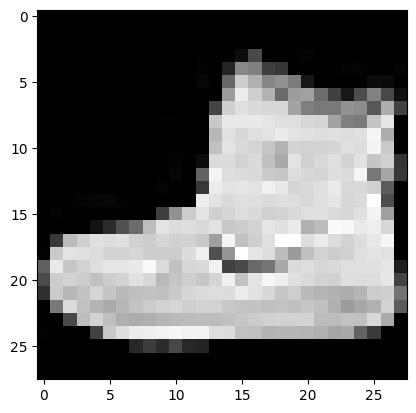

In [ ]:
train = FashionMNIST('.', download = True)
plt.imshow(train[0][0], cmap = 'gray')

In [ ]:
train = FashionMNIST('.', download = True, transform=ToTensor())
trainloader = DataLoader(train, batch_size = 32)

In [ ]:
train[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding = 1)

In [ ]:
output = conv1(train[0][0].unsqueeze(0))

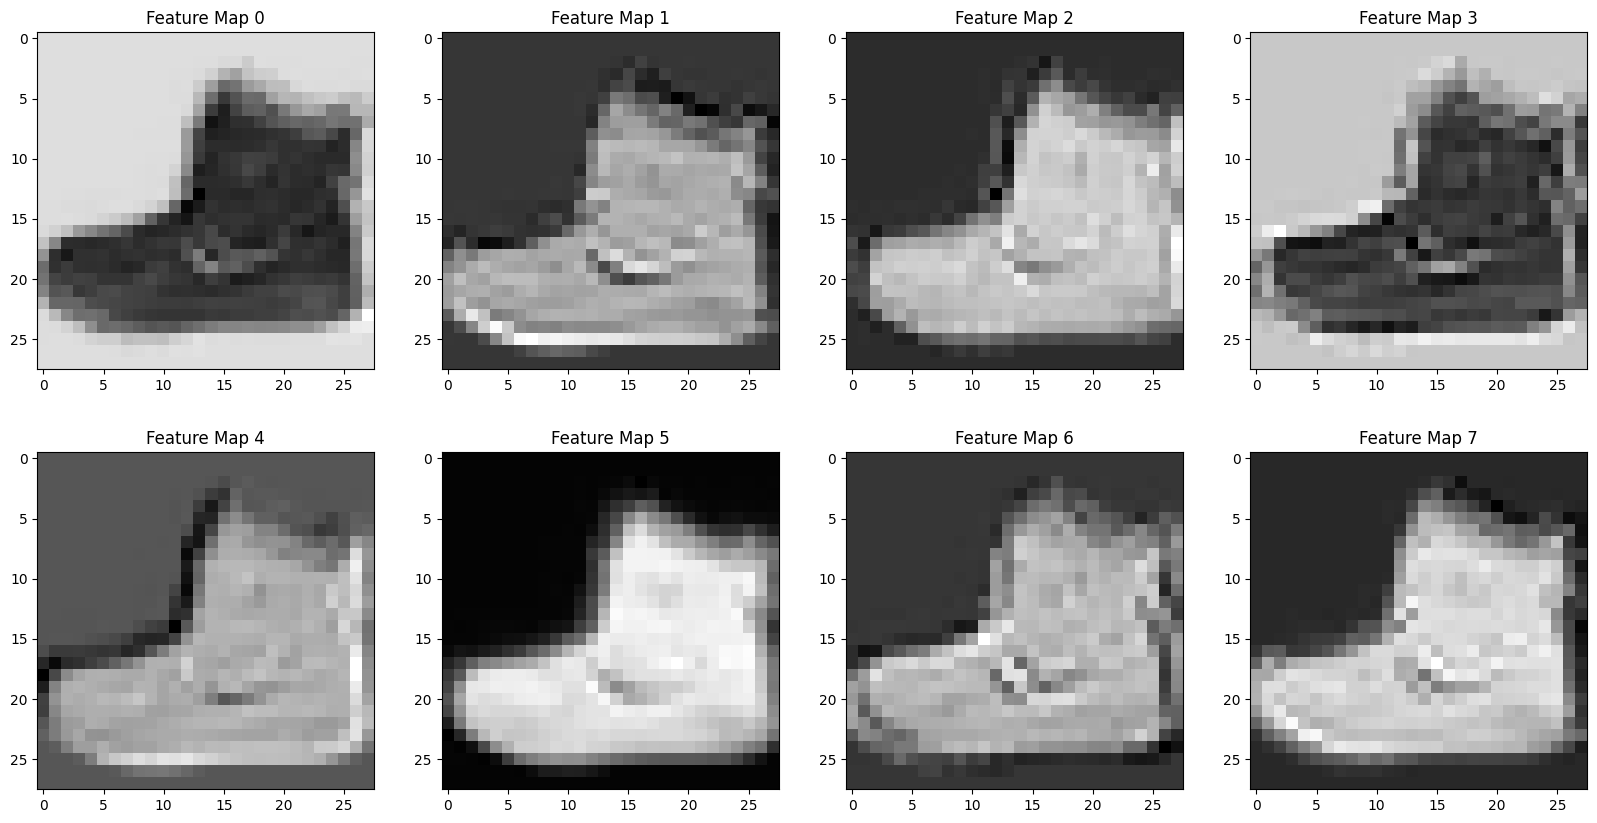

In [ ]:
fig, ax = plt.subplots(2, 4, figsize = (20, 10))
counter = 0
for i in range(2):
  for j in range(4):
    ax[i, j].imshow(output[0][counter].detach().numpy(), cmap = 'gray')
    ax[i,j].set_title(f'Feature Map {counter}')
    counter += 1

In [ ]:
pool = nn.MaxPool2d(2)

In [ ]:
output_pool = pool(output)

In [ ]:
output_pool[0].shape

torch.Size([8, 14, 14])

In [ ]:
conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding = 1)

In [ ]:
output_conv2 = conv2(output_pool)


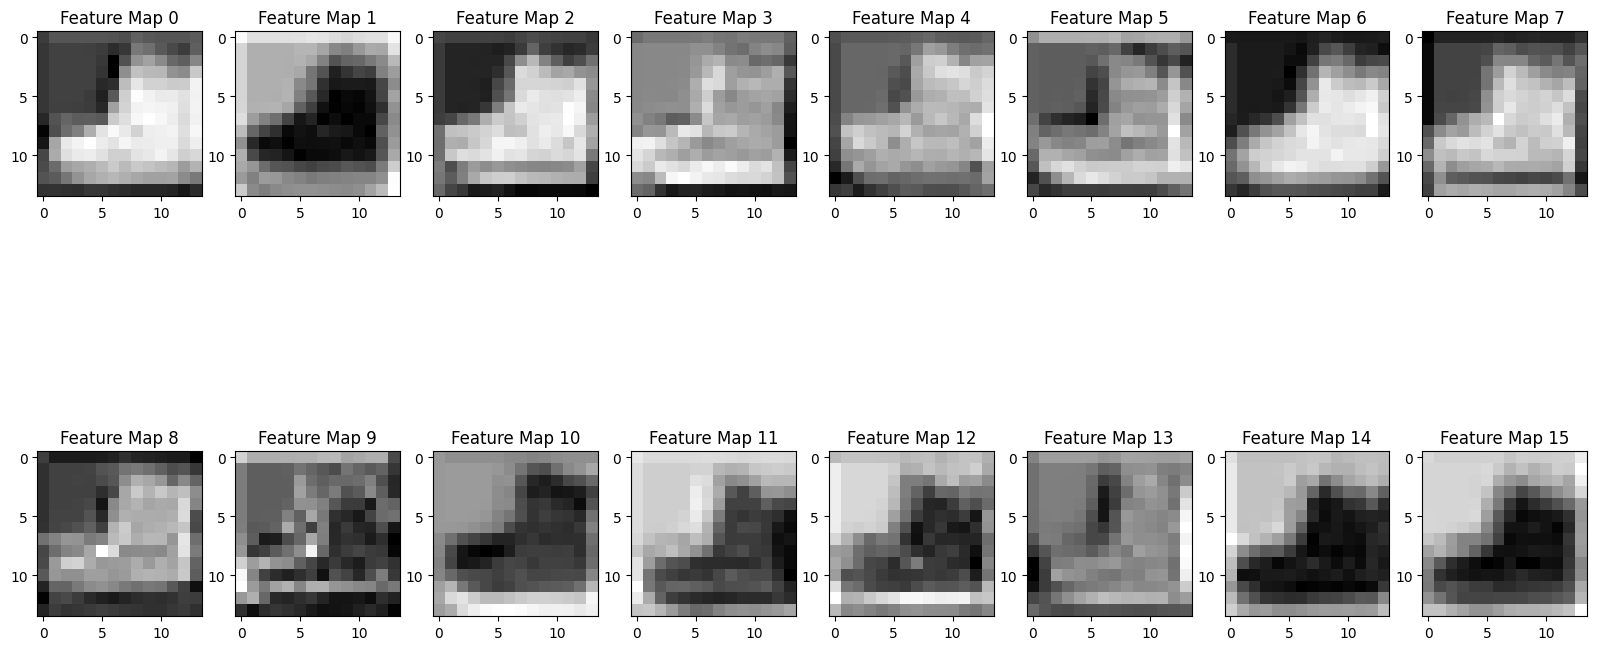

In [ ]:
fig, ax = plt.subplots(2, 8, figsize = (20, 10))
counter = 0
for i in range(2):
  for j in range(8):
    ax[i, j].imshow(output_conv2[0][counter].detach().numpy(), cmap = 'gray')
    ax[i,j].set_title(f'Feature Map {counter}')
    counter += 1

In [ ]:
flattener = nn.Flatten()

In [ ]:
flattener(output_conv2)

tensor([[-0.1546, -0.0853, -0.0853,  ..., -0.2281, -0.1964, -0.0180]],
       grad_fn=<ViewBackward0>)

In [ ]:
flattener(pool(output_conv2)).shape

torch.Size([1, 784])

In [ ]:
16*7*7

784

In [ ]:
linear1 = nn.Linear(in_features=16*7*7, out_features=128)
linear2 = nn.Linear(in_features = 128, out_features = 10)
conv_activation = nn.Tanh()
linear_activation = nn.ReLU()

In [ ]:
model = nn.Sequential(conv1, conv_activation, pool,
                      conv2, conv_activation, pool,
                      flattener,
                      linear1, linear_activation,
                      linear2)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
from tqdm import tqdm

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

In [ ]:
losses = []
for epoch in tqdm(range(20)):
  for X, y in trainloader:
    X, y = X.to(device), y.to(device)
    yhat = model(X)
    loss = loss_fn(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  losses.append(loss.item())
  print(f'Epoch {epoch} Loss: {loss.item()}')

  5%|▌         | 1/20 [00:10<03:25, 10.80s/it]

Epoch 0 Loss: 0.6855793595314026


 10%|█         | 2/20 [00:20<03:01, 10.09s/it]

Epoch 1 Loss: 0.5701147317886353


 15%|█▌        | 3/20 [00:29<02:46,  9.82s/it]

Epoch 2 Loss: 0.4900570511817932


 20%|██        | 4/20 [00:39<02:34,  9.67s/it]

Epoch 3 Loss: 0.44131016731262207


 25%|██▌       | 5/20 [00:48<02:24,  9.62s/it]

Epoch 4 Loss: 0.4020034670829773


 30%|███       | 6/20 [00:58<02:13,  9.57s/it]

Epoch 5 Loss: 0.36480391025543213


 35%|███▌      | 7/20 [01:07<02:04,  9.56s/it]

Epoch 6 Loss: 0.33669427037239075


 40%|████      | 8/20 [01:17<01:54,  9.57s/it]

Epoch 7 Loss: 0.31179100275039673


 45%|████▌     | 9/20 [01:26<01:44,  9.53s/it]

Epoch 8 Loss: 0.28992438316345215


 50%|█████     | 10/20 [01:36<01:35,  9.52s/it]

Epoch 9 Loss: 0.27379176020622253


 55%|█████▌    | 11/20 [01:45<01:25,  9.52s/it]

Epoch 10 Loss: 0.260379433631897


 60%|██████    | 12/20 [01:55<01:16,  9.55s/it]

Epoch 11 Loss: 0.25249701738357544


 65%|██████▌   | 13/20 [02:05<01:06,  9.53s/it]

Epoch 12 Loss: 0.24693898856639862


 70%|███████   | 14/20 [02:14<00:57,  9.50s/it]

Epoch 13 Loss: 0.23878678679466248


 75%|███████▌  | 15/20 [02:23<00:47,  9.47s/it]

Epoch 14 Loss: 0.2303779572248459


 80%|████████  | 16/20 [02:33<00:37,  9.44s/it]

Epoch 15 Loss: 0.22685496509075165


 85%|████████▌ | 17/20 [02:42<00:28,  9.44s/it]

Epoch 16 Loss: 0.22077932953834534


 90%|█████████ | 18/20 [02:52<00:18,  9.43s/it]

Epoch 17 Loss: 0.21800294518470764


 95%|█████████▌| 19/20 [03:01<00:09,  9.43s/it]

Epoch 18 Loss: 0.2159826159477234


100%|██████████| 20/20 [03:10<00:00,  9.55s/it]

Epoch 19 Loss: 0.2131742686033249


In [ ]:
model

Sequential(
  (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): Tanh()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): Tanh()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=784, out_features=128, bias=True)
  (8): ReLU()
  (9): Linear(in_features=128, out_features=10, bias=True)
)

Exploring what the network is paying attention to by visualizing the results of the convolutions after being trained for 20 epochs.  

In [ ]:
x = train[0][0].to(device)
for layer in model:
  print(layer)
  if isinstance(layer, nn.Flatten):
    break
  x = layer(x)


Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Tanh()
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Tanh()
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Flatten(start_dim=1, end_dim=-1)


In [ ]:
x.shape

torch.Size([16, 7, 7])

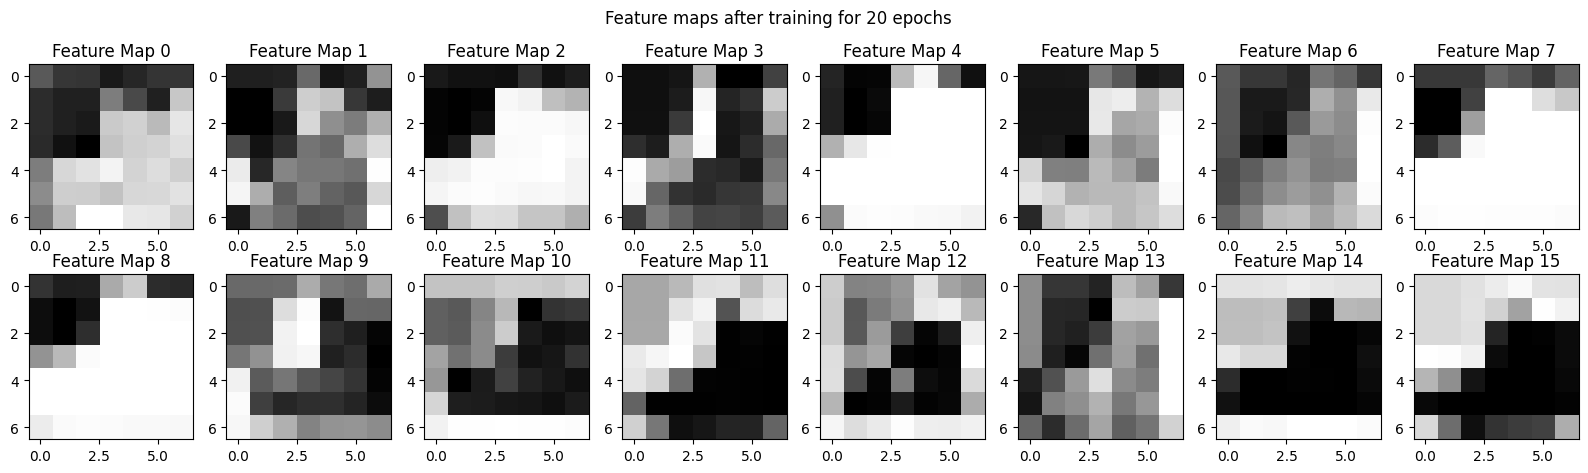

In [ ]:
fig, ax = plt.subplots(2, 8, figsize = (20, 5))
counter = 0
for i in range(2):
  for j in range(8):
    ax[i, j].imshow(x[counter].cpu().detach().numpy(), cmap = 'gray')
    ax[i,j].set_title(f'Feature Map {counter}')
    counter += 1
fig.suptitle('Feature maps after training for 20 epochs');

In [ ]:
x = train[1][0].to(device)
for layer in model:
  print(layer)
  if isinstance(layer, nn.Flatten):
    break
  x = layer(x)

Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Tanh()
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Tanh()
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Flatten(start_dim=1, end_dim=-1)


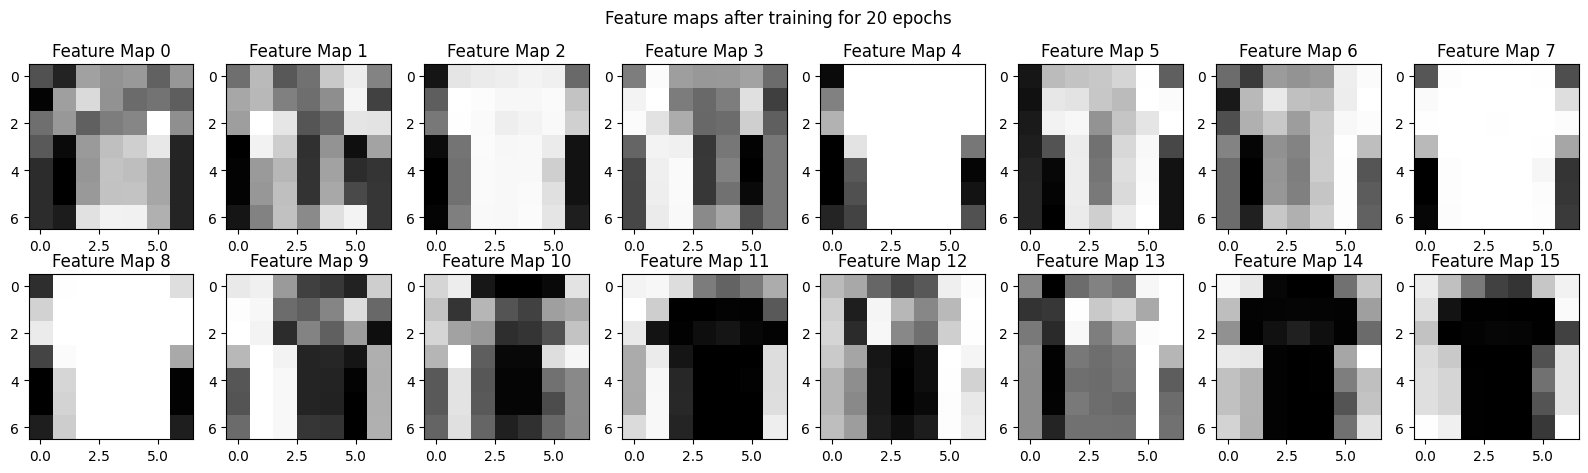

In [ ]:
fig, ax = plt.subplots(2, 8, figsize = (20, 5))
counter = 0
for i in range(2):
  for j in range(8):
    ax[i, j].imshow(x[counter].cpu().detach().numpy(), cmap = 'gray')
    ax[i,j].set_title(f'Feature Map {counter}')
    counter += 1
fig.suptitle('Feature maps after training for 20 epochs');

In [ ]:
correct = 0
total = 0
for x, y in trainloader:
  x, y = x.to(device), y.to(device)
  yhat = model(x)
  correct += (torch.argmax(yhat, dim = 1) == y).sum()
  total += len(y)

In [ ]:
correct/total

tensor(0.9125, device='cuda:0')

In [ ]:
torch.save(model, 'fashionmodel.pt')

**PROBLEM 2**

Below, a dataset containing 10 images of

In [ ]:
from torchvision.datasets import CIFAR10

In [ ]:
train = CIFAR10(root = '.', download = True, transform=ToTensor())

100%|██████████| 170M/170M [00:19<00:00, 8.62MB/s]


In [ ]:
train[0][0]

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

In [ ]:
from torchvision.utils import make_grid

In [ ]:
grid = make_grid([train[i][0] for i in range(16)], nrow=4)

In [ ]:
import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

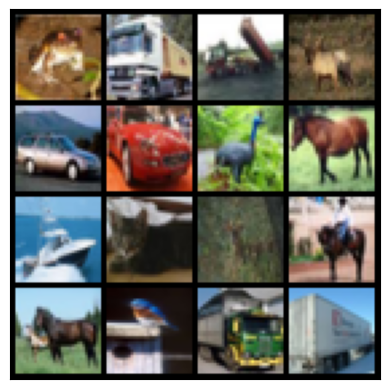

In [ ]:
show(grid)

In [ ]:
train[0][0].shape

torch.Size([3, 32, 32])

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights

In [ ]:
#loading in the prebuilt model weights
weights = ResNet50_Weights.DEFAULT
#loads in the transformations to the images that need
#to happen before the image goes into the network
transforms = weights.transforms()

In [ ]:
#load model and weights
model = resnet50(weights = weights)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 243MB/s]


In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
#changing the output of model to reflect my task
#(classify 10 images)
model.fc = nn.Linear(in_features=2048, out_features=10)

In [ ]:
trainloader = DataLoader(train, batch_size = 32)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
from tqdm import tqdm

In [ ]:
model = model.to(device)
for epoch in tqdm(range(5)):
  for x,y in trainloader:
    x = transforms(x)
    x, y = x.to(device), y.to(device)
    yhat = model(x)
    loss = loss_fn(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f'Epoch {epoch} Loss: {loss.item()}')

 20%|██        | 1/5 [01:05<04:20, 65.15s/it]

Epoch 0 Loss: 0.28705793619155884


 40%|████      | 2/5 [02:09<03:14, 64.89s/it]

Epoch 1 Loss: 0.03267575800418854


 60%|██████    | 3/5 [03:14<02:09, 64.81s/it]

Epoch 2 Loss: 0.011933280155062675


 80%|████████  | 4/5 [04:19<01:04, 64.76s/it]

Epoch 3 Loss: 0.005189882591366768


100%|██████████| 5/5 [05:23<00:00, 64.79s/it]

Epoch 4 Loss: 0.002533166203647852


In [ ]:
correct = 0
total = 0
model = model.to(device)
for x,y in trainloader:
    x,y = x.to(device), y.to(device)
    x = transforms(x)
    x, y = x.to(device), y.to(device)
    yhat = model(x)
    correct += (torch.argmax(yhat, dim = 1) == y).sum()
    total += len(y)

In [ ]:
correct/total

tensor(0.9999, device='cuda:0')

In [ ]:
torch.save(model, 'cifarmodel.pt')

In [ ]:
weights = ResNet50_Weights.DEFAULT #pretrained weights
transforms = weights.transforms() #transforms to get your pictures in right format
model = resnet50(weights = weights) #model with pretrained weights

In [ ]:
model.fc = nn.Linear(2048, 2)

In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = 'drive/MyDrive/small/train/'

In [ ]:
train = ImageFolder(path, transform=transforms)
val = ImageFolder('drive/MyDrive/small/val/', transform = transforms)

In [ ]:
trainloader = DataLoader(train, batch_size = 32)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
transforms

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
model = model.to(device)
for epoch in tqdm(range(20)):
  for x,y in trainloader:
    #x = transforms(x)
    x, y = x.to(device), y.to(device)
    yhat = model(x)
    loss = loss_fn(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f'Epoch {epoch} Loss: {loss.item()}')

  5%|▌         | 1/20 [14:50<4:42:03, 890.73s/it]

Epoch 0 Loss: 0.034350935369729996


 10%|█         | 2/20 [15:04<1:52:25, 374.73s/it]

Epoch 1 Loss: 0.04539049416780472


 15%|█▌        | 3/20 [15:17<59:24, 209.69s/it]  

Epoch 2 Loss: 0.05187246575951576


 20%|██        | 4/20 [15:30<35:14, 132.13s/it]

Epoch 3 Loss: 0.05185665562748909


 25%|██▌       | 5/20 [15:43<22:18, 89.22s/it] 

Epoch 4 Loss: 0.04622465744614601


 30%|███       | 6/20 [15:57<14:47, 63.42s/it]

Epoch 5 Loss: 0.03861143812537193


 35%|███▌      | 7/20 [16:10<10:11, 47.08s/it]

Epoch 6 Loss: 0.031364090740680695


 40%|████      | 8/20 [16:23<07:15, 36.32s/it]

Epoch 7 Loss: 0.025205546990036964


 45%|████▌     | 9/20 [16:37<05:19, 29.05s/it]

Epoch 8 Loss: 0.0202238317579031


 50%|█████     | 10/20 [16:49<04:00, 24.08s/it]

Epoch 9 Loss: 0.016219014301896095


 55%|█████▌    | 11/20 [17:03<03:06, 20.72s/it]

Epoch 10 Loss: 0.01304789911955595


 60%|██████    | 12/20 [17:16<02:27, 18.44s/it]

Epoch 11 Loss: 0.010647003538906574


 65%|██████▌   | 13/20 [17:29<01:58, 16.87s/it]

Epoch 12 Loss: 0.008814563043415546


 70%|███████   | 14/20 [17:42<01:34, 15.82s/it]

Epoch 13 Loss: 0.007348556071519852


 75%|███████▌  | 15/20 [17:56<01:15, 15.06s/it]

Epoch 14 Loss: 0.0063341292552649975


 80%|████████  | 16/20 [18:09<00:57, 14.50s/it]

Epoch 15 Loss: 0.005461719818413258


 85%|████████▌ | 17/20 [18:22<00:42, 14.11s/it]

Epoch 16 Loss: 0.00478871027007699


 90%|█████████ | 18/20 [18:35<00:27, 13.84s/it]

Epoch 17 Loss: 0.0042122602462768555


 95%|█████████▌| 19/20 [18:49<00:13, 13.66s/it]

Epoch 18 Loss: 0.0037727560847997665


100%|██████████| 20/20 [19:02<00:00, 57.12s/it]

Epoch 19 Loss: 0.0033806527499109507


In [ ]:
torch.save(model, 'catdog.pt')

In [ ]:
correct = 0
total = 0
model = model.to(device)
for x,y in trainloader:
    x,y = x.to(device), y.to(device)
    x = transforms(x)
    x, y = x.to(device), y.to(device)
    yhat = model(x)
    correct += (torch.argmax(yhat, dim = 1) == y).sum()
    total += len(y)

In [ ]:
correct/total

tensor(0.9931, device='cuda:0')

In [ ]:
valloader = DataLoader(val, batch_size=32)

In [ ]:
correct = 0
total = 0
model = model.to(device)
model.eval()
for x,y in tqdm(valloader):
    x,y = x.to(device), y.to(device)
    #x = transforms(x)
    #x, y = x.to(device), y.to(device)
    yhat = model(x)
    correct += (torch.argmax(yhat, dim = 1) == y).sum()
    total += len(y)

100%|██████████| 34/34 [14:15<00:00, 25.16s/it]


In [ ]:
correct/total

tensor(0.9185, device='cuda:0')

### Example with Mobilenet V3

In [ ]:
from torchvision.models import MobileNet_V3_Small_Weights, mobilenetv3

In [ ]:
weights = MobileNet_V3_Small_Weights.DEFAULT
transforms = weights.transforms()

In [ ]:
model = mobilenetv3.mobilenet_v3_small(weights = weights)

Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth


100%|██████████| 9.83M/9.83M [00:00<00:00, 192MB/s]


In [ ]:
model

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [ ]:
from torchvision.io import read_image

In [ ]:
cat = read_image('catpic.png')

In [ ]:
cat

tensor([[[186, 186, 186,  ..., 173, 173, 173],
         [186, 186, 186,  ..., 175, 175, 175],
         [186, 186, 185,  ..., 176, 176, 176],
         ...,
         [ 21,  14,  12,  ...,  22,  25,  27],
         [ 17,  15,  18,  ...,  20,  23,  25],
         [ 19,  18,  22,  ...,  18,  21,  24]],

        [[177, 177, 177,  ..., 170, 170, 170],
         [177, 177, 177,  ..., 172, 172, 172],
         [177, 177, 176,  ..., 173, 173, 173],
         ...,
         [ 72,  65,  67,  ...,  84,  89,  91],
         [ 68,  66,  73,  ...,  82,  87,  89],
         [ 70,  70,  77,  ...,  80,  85,  88]],

        [[162, 162, 162,  ..., 151, 151, 151],
         [162, 162, 162,  ..., 153, 153, 153],
         [162, 162, 161,  ..., 154, 154, 154],
         ...,
         [ 16,   6,   2,  ...,   7,  11,  13],
         [ 11,   7,   6,  ...,   5,   9,  11],
         [ 13,   8,  10,  ...,   3,   7,  10]],

        [[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [25

In [ ]:
cat.shape

torch.Size([4, 980, 1468])

In [ ]:
x = transforms(cat[:-1, :, :])

In [ ]:
x.unsqueeze(0).shape

torch.Size([1, 3, 224, 224])

In [ ]:
output = model(x.unsqueeze(0))

In [ ]:
import torch

In [ ]:
torch.argmax(output, dim = 1)

tensor([87])

In [ ]:
from IPython.display import Image

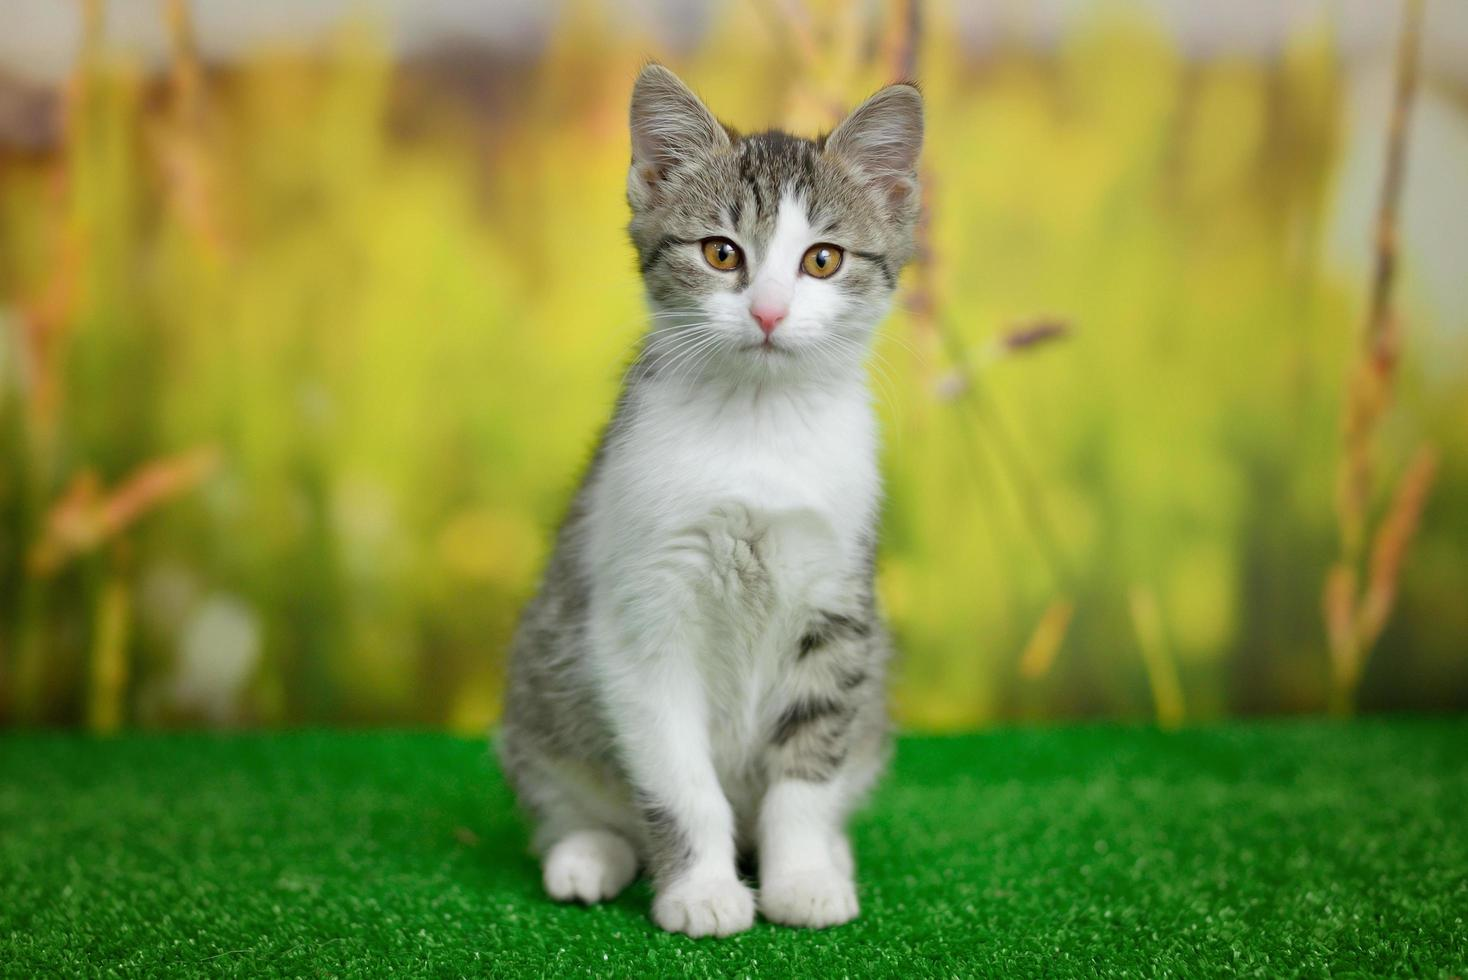

In [ ]:
Image('catpic.png')

In [ ]:
weights.meta['categories'][87]

'African grey'